# AIPI 590 - XAI | Assignment #08
### Description
Visualize the embedding space of the NV-Embed-v2 model on the MTEB leaderboard developed by Nvidia using tSNE, PCA, and UMAP

### Keese Phillips


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keesephillips/aipi590_xai/blob/main/assignment_8/assignment_8.ipynb)

In [ ]:

import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "aipi590_xai"
git_path = 'https://github.com/keesephillips/aipi590_xai'
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}"

# Change working directory to location of notebook
notebook_dir = 'asignment_8'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

import warnings
warnings.filterwarnings("ignore")

In [1]:
# Each query needs to be accompanied by an corresponding instruction describing the task.
task_name_to_instruct = {"example": "Given a question, retrieve passages that answer the question",}


# load model with tokenizer
model = AutoModel.from_pretrained('nvidia/NV-Embed-v2', trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [2]:
query_prefix = "Instruct: "+task_name_to_instruct["example"]+"\nQuery: "
queries = [
    "What are the main causes of climate change?",
    "How does quantum computing work?",
    "What are the health benefits of meditation?",
    "Explain the plot of Shakespeare's Hamlet",
    "What is the process of photosynthesis?",
    "How do vaccines work?",
    "What are the key features of impressionist art?",
    "Explain the concept of supply and demand in economics",
    "What is the history of the Olympic Games?",
    "How does a blockchain work?"
]
# No instruction needed for retrieval passages
passage_prefix = ""
passages = [
    "Climate change is primarily caused by human activities that release greenhouse gases into the atmosphere. The main contributors are burning fossil fuels for energy, deforestation, and industrial processes. These activities increase the concentration of heat-trapping gases like carbon dioxide, methane, and nitrous oxide in the atmosphere, leading to global warming and its associated impacts on weather patterns, sea levels, and ecosystems.",

    "Quantum computing leverages the principles of quantum mechanics to perform complex calculations. Unlike classical computers that use bits (0 or 1), quantum computers use quantum bits or qubits, which can exist in multiple states simultaneously due to superposition. This allows quantum computers to process vast amounts of information in parallel, potentially solving certain problems much faster than classical computers.",

    "Meditation has been shown to offer numerous health benefits. Regular practice can reduce stress, anxiety, and depression by lowering cortisol levels and promoting relaxation. It may also improve focus and concentration, enhance emotional well-being, and boost the immune system. Some studies suggest that meditation can help manage chronic pain, lower blood pressure, and improve sleep quality.",

    "Hamlet, a tragedy by William Shakespeare, tells the story of the Prince of Denmark seeking revenge for his father's murder. Hamlet's uncle Claudius has killed the king and married Hamlet's mother, Gertrude. The play explores themes of revenge, madness, and moral corruption as Hamlet grapples with his duty to avenge his father and his own moral qualms about murder.",

    "Photosynthesis is the process by which plants and other organisms convert light energy into chemical energy. It occurs in the chloroplasts of plant cells, where chlorophyll captures sunlight. This energy is used to convert carbon dioxide and water into glucose and oxygen. The glucose serves as food for the plant, while oxygen is released as a byproduct, playing a crucial role in maintaining Earth's atmosphere.",

    "Vaccines work by stimulating the body's immune system to recognize and fight specific pathogens. They typically contain weakened or inactivated forms of the pathogen, or parts of it, which trigger an immune response without causing the disease. This response produces antibodies and memory cells, allowing the immune system to quickly recognize and neutralize the actual pathogen if exposed in the future, thus preventing or reducing the severity of the disease.",

    "Impressionist art, which emerged in the late 19th century, is characterized by its emphasis on capturing the visual effects of light and color in everyday scenes. Key features include visible brushstrokes, vibrant colors, and a focus on depicting the changing qualities of light. Impressionists often painted outdoors to capture fleeting moments and atmospheric conditions, breaking from traditional studio-based painting.",

    "Supply and demand is a fundamental concept in economics that describes how the price and quantity of a good or service in a market are related to the desire of buyers and sellers. The law of demand states that as the price of a good increases, the quantity demanded decreases. Conversely, the law of supply states that as the price increases, the quantity supplied increases. The equilibrium price is reached where supply and demand intersect.",

    "The Olympic Games originated in ancient Greece around 776 BCE as a religious and athletic festival held in Olympia. The modern Olympics were revived in 1896 by Baron Pierre de Coubertin. Initially a small event, they have grown into a major international sporting competition held every four years. The Games have evolved to include both Summer and Winter editions, featuring a wide array of sports and attracting athletes from around the world.",

    "A blockchain is a decentralized, digital ledger that records transactions across a network of computers. Each block in the chain contains a number of transactions, and every time a new transaction occurs, a record of that transaction is added to every participant's ledger. This technology ensures transparency, security, and immutability of data, as altering any block would require changing all subsequent blocks across the entire network."
]

# get the embeddings
max_length = 32768
query_embeddings = model.encode(queries, instruction=query_prefix, max_length=max_length)
passage_embeddings = model.encode(passages, instruction=passage_prefix, max_length=max_length)

# normalize embeddings
query_embeddings = F.normalize(query_embeddings, p=2, dim=1)
passage_embeddings = F.normalize(passage_embeddings, p=2, dim=1)


/root/.cache/huggingface/modules/transformers_modules/nvidia/NV-Embed-v2/0783263f3c009f67bd0e177040cfecad4b1171d6/modeling_nvembed.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(batch_dict.get('input_ids').to(batch_dict.get('input_ids')).long()),
/usr/lib/python3.10/contextlib.py:103: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


In [3]:
all_embeddings = np.vstack([query_embeddings.cpu().numpy(), passage_embeddings.cpu().numpy()])

# Create labels for the plot
labels = [
    'Query: Climate Change',
    'Query: Quantum Computing',
    'Query: Meditation and Health',
    'Query: Hamlet',
    'Query: Photosynthesis',
    'Query: Vaccines',
    'Query: Impressionist Art',
    'Query: Supply and Demand',
    'Query: Olympic Games',
    'Query: Blockchain',
    'Passage: Climate Change',
    'Passage: Quantum Computing',
    'Passage: Meditation and Health',
    'Passage: Hamlet',
    'Passage: Photosynthesis',
    'Passage: Vaccines',
    'Passage: Impressionist Art',
    'Passage: Supply and Demand',
    'Passage: Olympic Games',
    'Passage: Blockchain'
]

def plot_embeddings(embeddings, title):
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)

    for i, label in enumerate(labels):
        plt.scatter(embeddings[i, 0], embeddings[i, 1], label=label)
    plt.title(title)

    # Remove the legend from the main plot
    ax.legend().remove()

    # Adjust the plot layout to make room for the legend
    plt.tight_layout()

    # Add the legend outside the plot on the right
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Adjust the layout to prevent the legend from being cut off
    plt.subplots_adjust(right=0.75)

    plt.show()

# t-SNE


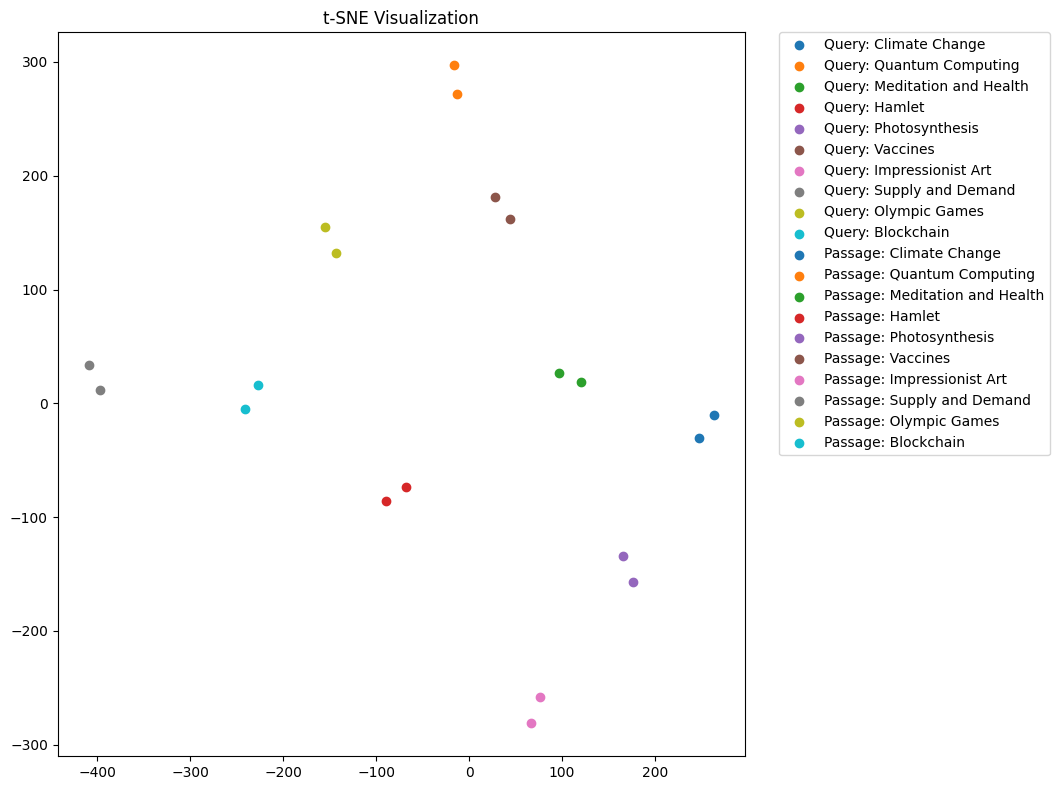

In [4]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
tsne_embeddings = tsne.fit_transform(all_embeddings)
plot_embeddings(tsne_embeddings, 't-SNE Visualization')

# PCA


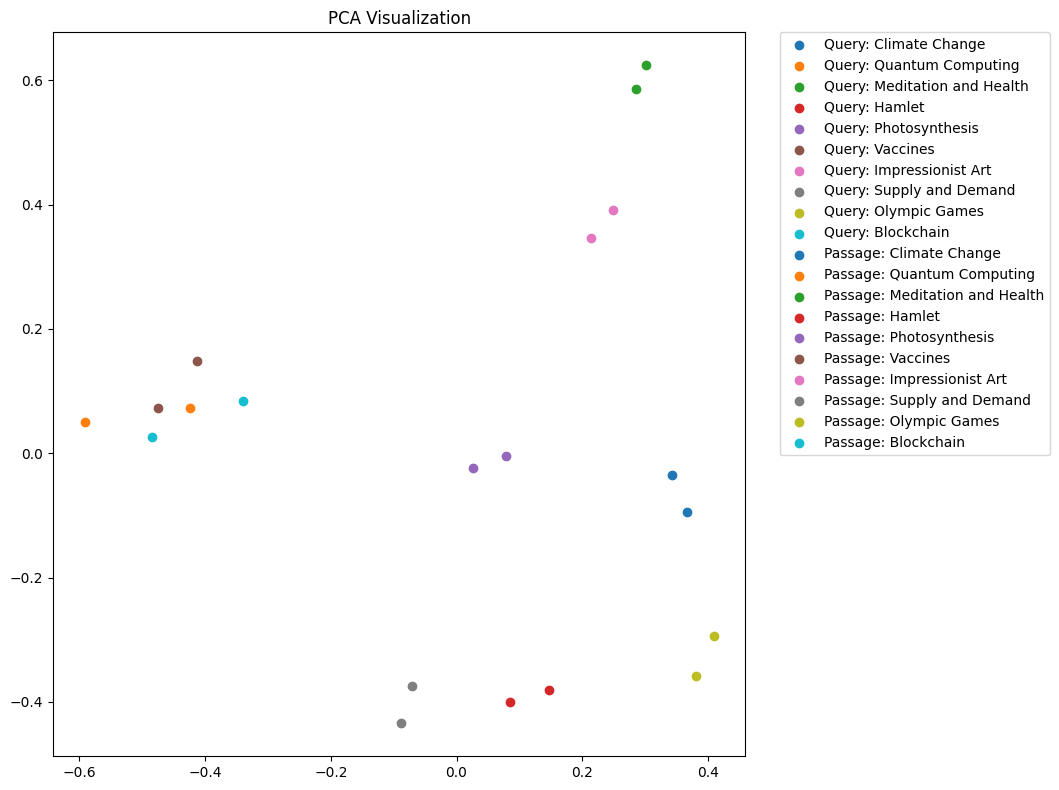

In [15]:
# PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(all_embeddings)
plot_embeddings(pca_embeddings, 'PCA Visualization')

# UMP


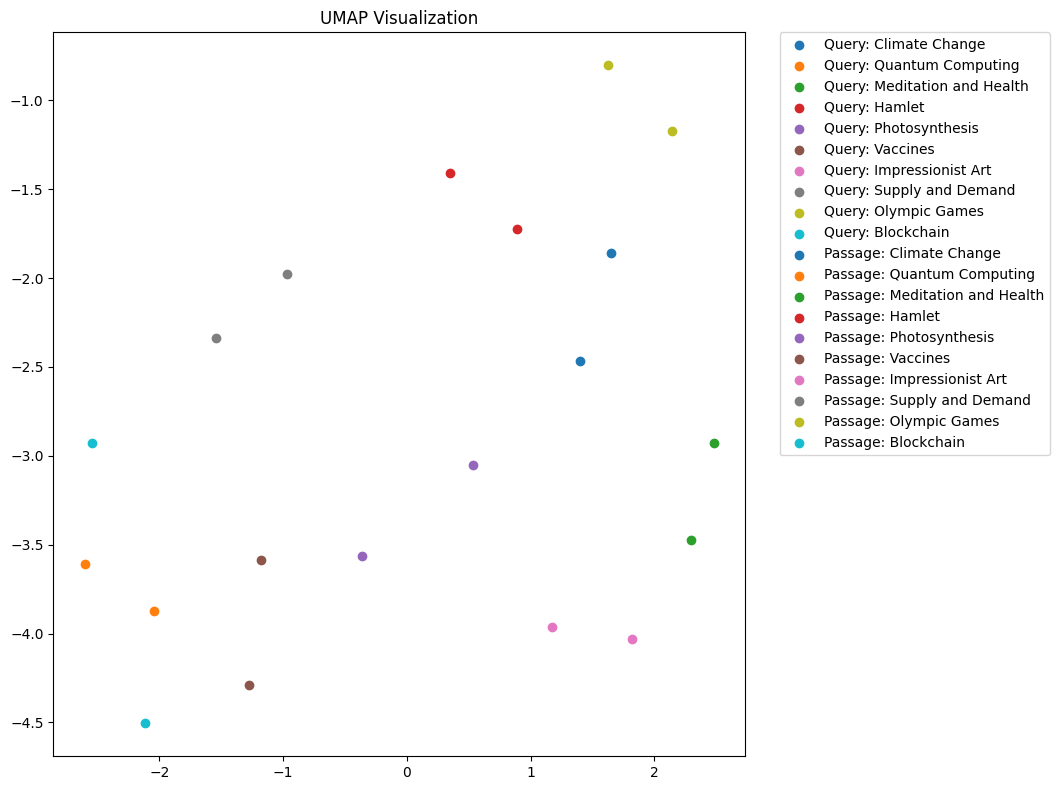

In [7]:
# UMAP
umap_reducer = umap.UMAP(n_neighbors=4, min_dist=0.3, metric='cosine')
umap_embeddings = umap_reducer.fit_transform(all_embeddings)
plot_embeddings(umap_embeddings, 'UMAP Visualization')

# Summary

t-SNE captures the local complex and non-linear relationships. t-SNE appears to cluster relationships with the maximum distance between one another.

PCA is simple and captures local linear relationships. However, PCA struggles to capture the non-linear or complex relationships that may underly the data. The PCA approach in this case seems to cluster the blockchain, quantum computing, and vaccines close together. The embedding for vaccines seems unusual, and can probably be explained within the limitations of PCA to capture non-linear complex relationships.  

UMAP captures the complex non-linear relationships in the dataset. Furthermore UMAP captures both local and global structures. UMAP also clusters blockchain, quantum computing, and vaccines interestingly close together. There might be some unqiue relationship between vaccine and technology that is embedded.
